<a href="https://colab.research.google.com/github/nedokormysh/Stepik_data_analysis_R/blob/week_2_stat_part_1/Stepik_data_analysis_R_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 2_3_4

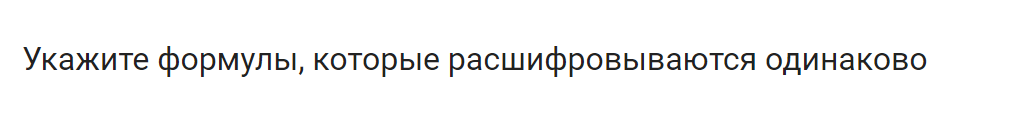

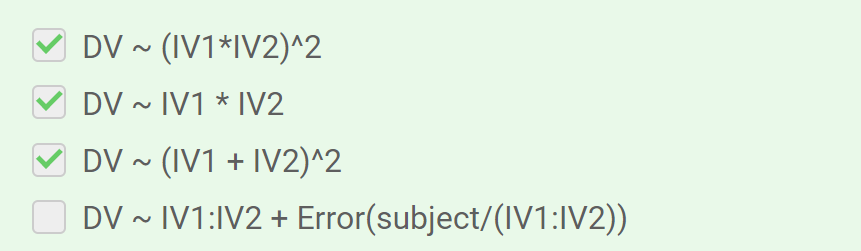

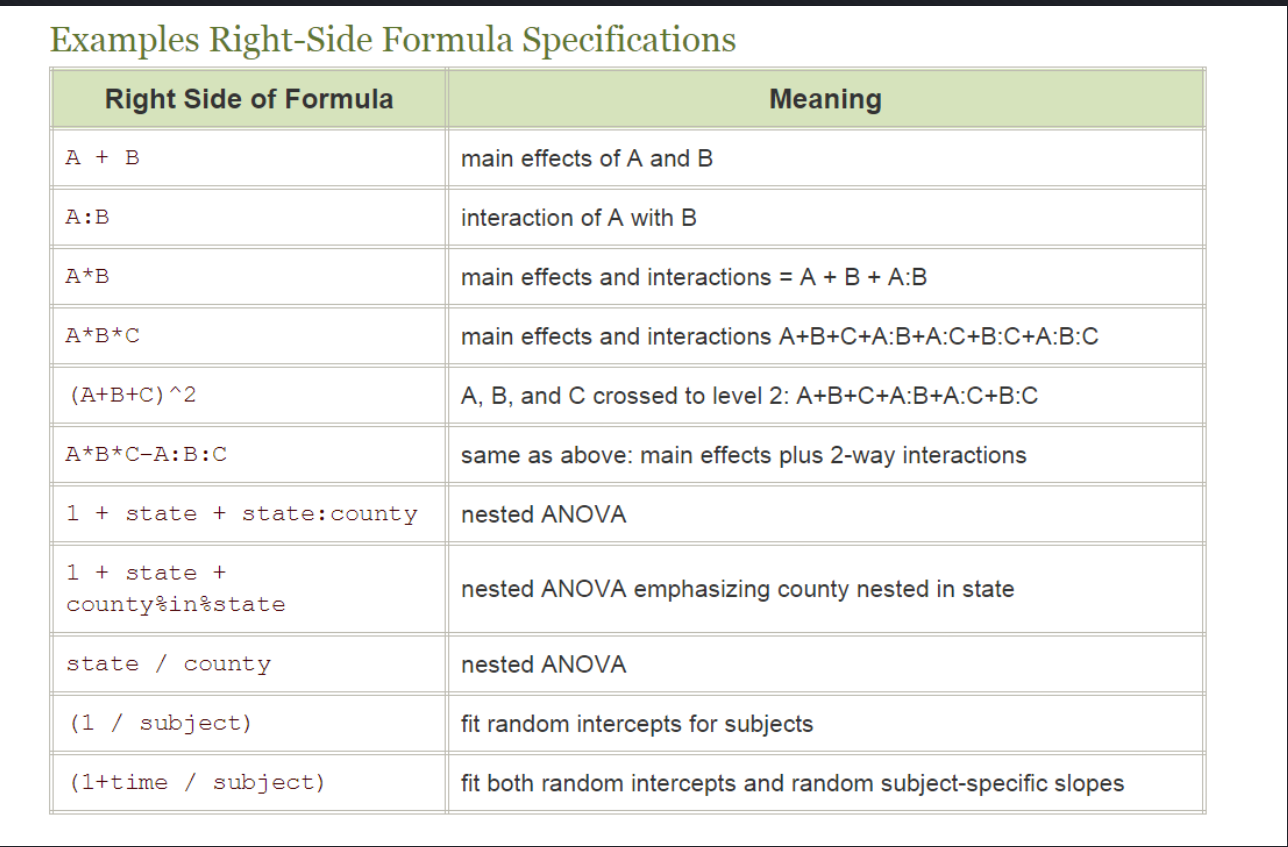

# Extra

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat

df = pd.DataFrame(pd.read_csv('shop.csv'))

sns.boxplot(data=df, y='price', x='origin', order=['import', 'russia'])
plt.show()

res = stat()
res.anova_stat(df=df, res_var='price', anova_model='price ~ origin')
print(res.anova_summary)

# 2_3_7

Воспользуемся встроенными данными npk, иллюстрирующими влияние применения различных удобрений на урожайность гороха (yield). Нашей задачей будет выяснить, существенно ли одновременное применение азота (фактор N) и фосфата (фактор P). Примените дисперсионный анализ, где будет проверяться влияние фактора применения азота (N), влияние фактора применения фосфата (P) и их взаимодействие.
В ответе укажите p-value для взаимодействия факторов N и P.

Десятичный разделитель - запятая!

In [3]:
fit <- aov(yield ~ N * P, npk)
summary(fit)

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   5.758 0.0263 *
P            1    8.4    8.40   0.256 0.6187  
N:P          1   21.3   21.28   0.647 0.4305  
Residuals   20  657.4   32.87                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns
# from bioinfokit.analys import stat

# df = pd.DataFrame(pd.read_csv('npk.csv'))

# sns.pointplot(data=df, x='N', y='yield_', hue='P', dodge=True)
# plt.show()

# fit = stat()
# fit.anova_stat(df=df, res_var='yield_', anova_model='yield_ ~ N * P')
# print(fit.anova_summary)

In [4]:
summary(aov(yield ~ N * P, data=npk))[[1]][3,5]

[1] 0.4304878

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"}) # Пришлось переименовать столбец, иначе функция из библиотеки statsmodels.formula.api "спотыкается" о формулу, т. к. в Python существует ключевое слово yield, которое используется в генераторах
# model_npk = smf.ols('growth ~ N * P', data=npk).fit()
# aov_table_npk = sm.stats.anova_lm(model_npk)
# aov_table_npk.unstack()["PR(>F)"]["N:P"]

# 2_3_6

Теперь проведите трехфакторный дисперсионный анализ, где зависимая переменная - это урожайность (yield), а три фактора - типы удобрений (N, P, K). После проведения данного анализа вы получите три значения p - уровня значимости (о значимости каждого из факторов).

Соотнесите названия факторов и значения p - уровня значимости.

In [6]:
summary(aov(yield ~ N + P + K, data=npk))

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   6.488 0.0192 *
P            1    8.4    8.40   0.288 0.5974  
K            1   95.2   95.20   3.263 0.0859 .
Residuals   20  583.5   29.17                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

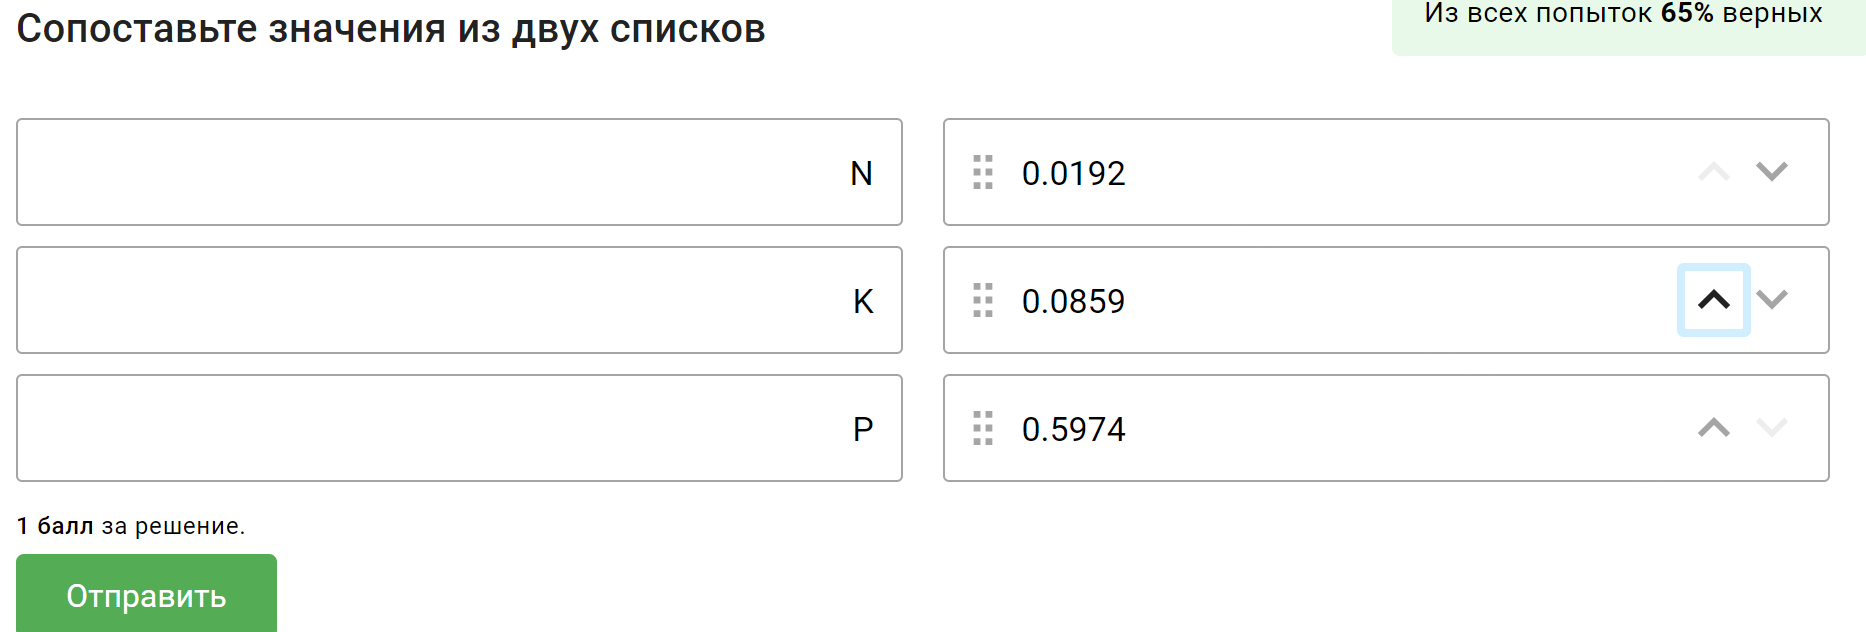

# 2_3_10

Проведите однофакторный дисперсионный анализ на встроенных данных iris. Зависимая переменная - ширина чашелистика (Sepal.Width), независимая переменная - вид (Species). Затем проведите попарные сравнения видов. Какие виды статистически значимо различаются по ширине чашелистика (p < 0.05)?

In [7]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [10]:
TukeyHSD(aov(Sepal.Width ~ Species, data=iris))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


In [12]:
# import seaborn as sns
# import statsmodels.api as sm

# iris = sns.load_dataset("iris")
# tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris.sepal_width, groups=iris.species)
# print(tukey_test_result_iris)

In [14]:
fit <- aov(iris$Sepal.Width ~ iris$Species)
summary(fit)
# TukeyHSD(fit6)

              Df Sum Sq Mean Sq F value Pr(>F)    
iris$Species   2  11.35   5.672   49.16 <2e-16 ***
Residuals    147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# 2_3_12

В этой задаче вам дан набор данных, в котором представлена информация о температуре нескольких пациентов, которые лечатся разными таблетками и у разных врачей.

Проведите однофакторный дисперсионный анализ с повторными измерениями: влияние типа таблетки (pill) на температуру (temperature) с учётом испытуемого (patient). Каково p-value для влияния типа таблеток на температуру?
Данные: https://stepik.org/media/attachments/lesson/11505/Pillulkin.csv

Не забудьте, важно перевести переменную patient в фактор!  

In [17]:
Pillulkin <- read.csv('https://stepik.org/media/attachments/lesson/11505/Pillulkin.csv')
head(Pillulkin)

,temperature,pill,doctor,patient
,<dbl>,<chr>,<chr>,<int>
1,39.33055,A,Aibolit,1
2,40.74877,B,Aibolit,1
3,39.33913,A,Aibolit,2
4,38.20438,B,Aibolit,2
5,36.99757,A,Aibolit,3
6,38.50817,B,Aibolit,3


In [20]:
Pillulkin$patient <- as.factor(Pillulkin$patient)
Pillulkin$pill <- as.factor(Pillulkin$pill)

summary(aov(temperature ~ pill + Error(patient/pill), Pillulkin))


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: patient:pill
          Df Sum Sq Mean Sq F value Pr(>F)
pill       1  0.133   0.133   0.051  0.826
Residuals  9 23.479   2.609               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 20  87.51   4.375               

In [22]:
summary(aov(temperature ~ pill + Error(as.factor(patient)/pill), data = read.csv(url("https://stepik.org/media/attachments/lesson/11505/Pillulkin.csv"))))


Error: as.factor(patient)
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: as.factor(patient):pill
          Df Sum Sq Mean Sq F value Pr(>F)
pill       1  0.133   0.133   0.051  0.826
Residuals  9 23.479   2.609               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 20  87.51   4.375               

# 2_3_14

Теперь вашей задачей будет провести двухфакторный дисперсионный анализ с повторными измерениями: влияние факторов doctor, влияние фактора pill и их взаимодействие на temperature. Учтите обе внутригрупповые переменные: и тот факт, что один и тот же больной принимает разные таблетки, и тот факт, что  один и тот же больной лечится у разных врачей! Каково F-значение для взаимодействия факторов доктора (doctor) и типа таблеток (pill)?

Данные: https://stepik.org/media/attachments/lesson/11505/Pillulkin.csv

In [24]:
summary(aov(temperature ~ doctor * pill + Error(patient/(doctor * pill)), Pillulkin))


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: patient:doctor
          Df Sum Sq Mean Sq F value Pr(>F)
doctor     1  15.70  15.696   3.113  0.111
Residuals  9  45.37   5.042               

Error: patient:pill
          Df Sum Sq Mean Sq F value Pr(>F)
pill       1  0.133   0.133   0.051  0.826
Residuals  9 23.479   2.609               

Error: patient:doctor:pill
            Df Sum Sq Mean Sq F value Pr(>F)
doctor:pill  1  0.422  0.4215   0.146  0.711
Residuals    9 26.014  2.8905               

# 2_3_15

Вспомните графики из лекций и дополните шаблон графика в поле для ответа так (не добавляя еще один geom) , чтобы объединить линиями точки, принадлежащие разным уровням фактора supp. Не забудьте подключить нужный для построение графика пакет.
Пожалуйста, сохраните график в переменную obj.

Желаемый результат:

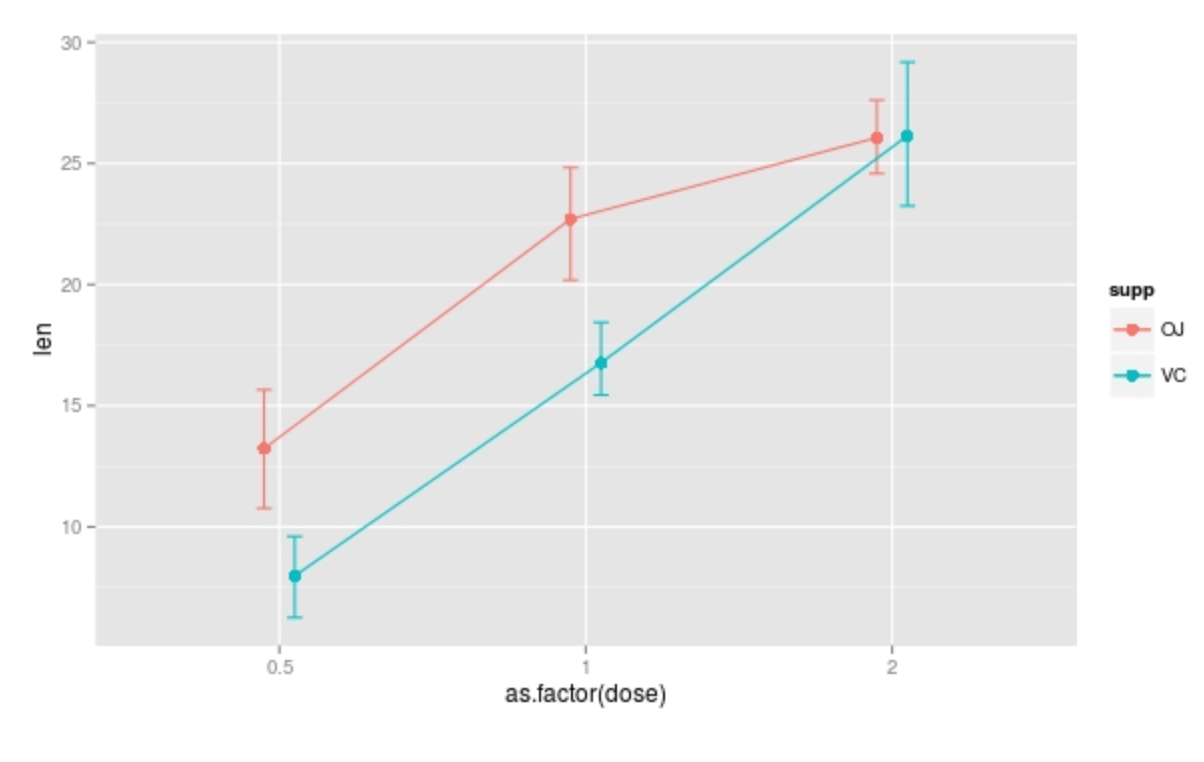

In [27]:
install.packages("Hmisc")
library('Hmisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
library(ggplot2)
obj <- ggplot(ToothGrowth, aes(x = as.factor(dose), y = len, col = supp))+
stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.1, position = position_dodge(0.2))+
stat_summary(fun.data = mean_cl_boot, geom = 'point', size = 3, position = position_dodge(0.2))+
stat_summary(fun.data = mean_cl_boot, geom = 'line', position = position_dodge(0.2))

In [30]:
head(ToothGrowth)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


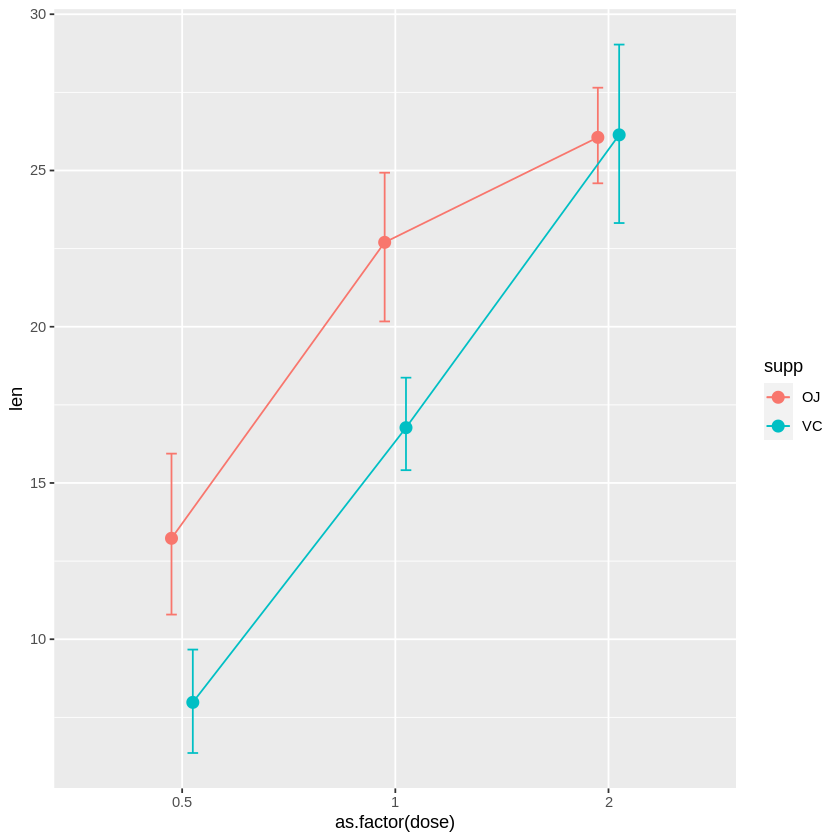

In [42]:
library(ggplot2)
obj <- ggplot(ToothGrowth, aes(x = as.factor(dose), y = len, col = supp, group=supp))+
stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.1, position = position_dodge(0.2))+
stat_summary(fun.data = mean_cl_boot, geom = 'point', size = 3, position = position_dodge(0.2))+
stat_summary(fun.data = mean_cl_boot, geom = 'line', position = position_dodge(0.2))

obj

In [ ]:
# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns

# df = pd.DataFrame(pd.read_csv('ToothGrowth.csv'))

# sns.pointplot(x='dose', y='len', hue='supp', data=df, dodge=True)
# plt.show()

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import seaborn as sns

# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# sns.set_theme(style="darkgrid")
# ax = sns.pointplot(x="dose", y="len", hue="supp", data=toothgrowth, join=True, capsize=.1, dodge=True)